In [2]:
import numpy as np
import pandas as pd

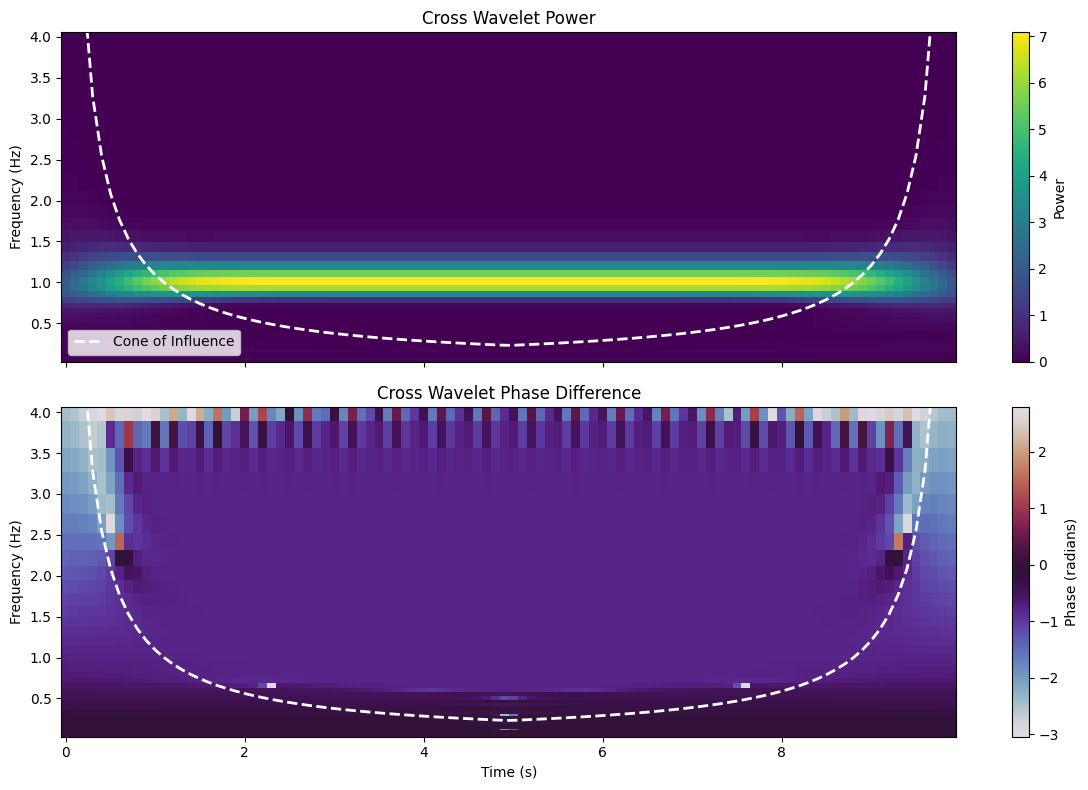

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pycwt as wavelet

# 1. Generate synthetic signals
dt = 0.1  # Sampling interval
t = np.arange(0, 10, dt)
signal1 = np.sin(2 * np.pi * t)
signal2 = np.sin(2 * np.pi * t + np.pi / 4)  # Phase shifted

# 2. Compute CWT for both signals
mother = wavelet.Morlet(5)  # Morlet wavelet with omega0=6
dj = 0.125  # Scale resolution
s0 = 2 * dt  # Smallest scale
J = 7 / dj  # Number of scales

wave1, scales, freqs, coi, _, _ = wavelet.cwt(signal1, dt, dj, s0, J, mother)
wave2, _, _, _, _, _ = wavelet.cwt(signal2, dt, dj, s0, J, mother)

# 3. Cross Wavelet Transform (XWT)
xwt = wave1 * np.conj(wave2) # Equivalent to arctan(Im/Re)
power = np.abs(xwt)  # Cross wavelet power
phase = np.angle(xwt)  # Phase difference

# 4. Visualization
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Cross Wavelet Power
pcm = axs[0].pcolormesh(
    t, freqs, power, shading='auto', cmap='viridis'
)
axs[0].plot(t, 1/coi, 'w--', linewidth=2, label='Cone of Influence')
axs[0].set_title('Cross Wavelet Power')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_ylim(freqs[-1], freqs[0])
fig.colorbar(pcm, ax=axs[0], label='Power')
axs[0].legend()

# Phase Difference
pcm2 = axs[1].pcolormesh(
    t, freqs, phase, shading='auto', cmap='twilight'
)
axs[1].plot(t, 1/coi, 'w--', linewidth=2)
axs[1].set_title('Cross Wavelet Phase Difference')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylim(freqs[-1], freqs[0])
fig.colorbar(pcm2, ax=axs[1], label='Phase (radians)')

plt.tight_layout()
plt.show()
